In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
from scipy.stats import norm
from scipy.stats import binom, geom

In [75]:
# Importing the dataset
df = pd.read_csv("aerofit_treadmill.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [76]:
# creating a copy of dataframe to retrive the original df later.
df2 = df.copy()


In [77]:
# as we can notice, the copy created is a deep copy
np.shares_memory(df, df2)

False

# Analysing basic metrics

In [59]:
df.shape

(180, 9)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [61]:
# converting "Usage" & "Fitness" columns to categorical variables
df[["Usage", "Fitness"]] = df[["Usage", "Fitness"]].astype("object")

In [62]:
# "Usage" & "Fitness" are converted to object Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    object
 6   Fitness        180 non-null    object
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 12.8+ KB


In [78]:
df.describe(include="all")


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [79]:
# just to retrive any value from above result
df.describe(include="all").loc["mean", "Miles"]

103.19444444444444

In [80]:
# Categorization of users based on Income:

b = [29000, 44058, 58668, 104581]
l = ["Low", "Medium", "High"]
df["Income_cat"] = pd.cut(df["Income"], bins=b, labels=l)

In [81]:
# Categorization of users based on Age:

b = [17, 25, 35, 51]
l = ["17-25", "25-35", "35-51"]
df["Age_bins"] = pd.cut(df["Age"], bins=b, labels=l)

In [82]:
# Categorization of users based on Miles:

b = [-1, 80, 110, 400]
l = ["<80", "80-110", "110+"]
df["Miles_bins"] = pd.cut(df["Miles"], bins=b, labels=l)

In [83]:
# Categorization of users based on Education:

b = [11, 17, 21]
l = ["UnderGrad", "PostGrad"]
df["Edu_cat"] = pd.cut(df["Education"], bins=b, labels=l)

# Non-Graphical Analysis

In [85]:
# There are no duplicate values in df
df[df.duplicated()==True]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_cat,Age_bins,Miles_bins,Edu_cat


## Value counts for some key categorical variables

In [86]:
 np.unique(df["Income_cat"], return_counts=True)

(array(['High', 'Low', 'Medium'], dtype=object),
 array([45, 45, 90], dtype=int64))

In [87]:
np.unique(df["Product"], return_counts=True)

(array(['KP281', 'KP481', 'KP781'], dtype=object),
 array([80, 60, 40], dtype=int64))

In [88]:
df["Gender"].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [89]:
df["MaritalStatus"].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [90]:
df["Fitness"].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [91]:
df["Miles_bins"].value_counts()

80-110    66
<80       60
110+      54
Name: Miles_bins, dtype: int64

In [92]:
df["Age_bins"].value_counts()

17-25    79
25-35    73
35-51    28
Name: Age_bins, dtype: int64

In [94]:
df["Edu_cat"].value_counts()

UnderGrad    153
PostGrad      27
Name: Edu_cat, dtype: int64

In [95]:
# Storing the price of each product in a different column 
df["Product_Price"] = np.where(df2["Product"]=='KP281', 1500, 0)
df["Product_Price"] = np.where(df2["Product"]=='KP481', 1750, df["Product_Price"])
df["Product_Price"] = np.where(df2["Product"]=='KP781', 2500, df["Product_Price"])

In [96]:
# as you can see, we created new column: "Product_Price"
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_cat,Age_bins,Miles_bins,Edu_cat,Product_Price
109,KP481,26,Female,16,Single,4,4,50028,127,Medium,25-35,110+,UnderGrad,1750
133,KP481,38,Female,16,Partnered,4,3,62535,85,High,35-51,80-110,UnderGrad,1750
83,KP481,20,Male,14,Single,3,3,38658,95,Low,17-25,80-110,UnderGrad,1750
148,KP781,24,Female,16,Single,5,5,52291,200,Medium,17-25,110+,UnderGrad,2500
21,KP281,23,Male,16,Single,4,3,40932,94,Low,17-25,80-110,UnderGrad,1500
15,KP281,23,Male,16,Partnered,3,3,40932,75,Low,17-25,<80,UnderGrad,1500
153,KP781,25,Male,18,Partnered,4,3,64741,100,High,17-25,80-110,PostGrad,2500
17,KP281,23,Male,16,Partnered,4,3,39795,94,Low,17-25,80-110,UnderGrad,1500
75,KP281,43,Male,16,Partnered,3,3,53439,66,Medium,35-51,<80,UnderGrad,1500
97,KP481,25,Female,14,Partnered,2,3,45480,85,Medium,17-25,80-110,UnderGrad,1750


## Creating the Crosstabs of relevant columns

In [97]:
PI = pd.crosstab(df["Product"], df["Income_cat"], margins = True, margins_name = "Total")
PI

Income_cat,Low,Medium,High,Total
Product,,,,
KP281,30,43,7,80
KP481,15,36,9,60
KP781,0,11,29,40
Total,45,90,45,180


In [98]:
# fetching total of all the columns from above table
pd.crosstab(df["Product"], df["Income_cat"], margins = True, margins_name = "Total").loc["Total", :]

Income_cat
Low        45
Medium     90
High       45
Total     180
Name: Total, dtype: int64

In [99]:
PG = pd.crosstab(df["Product"], df["Gender"], margins = True, margins_name = "Total")
PG

Gender,Female,Male,Total
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
Total,76,104,180


In [100]:
PM = pd.crosstab(df["Product"], df["MaritalStatus"], margins = True, margins_name = "Total")
PM

MaritalStatus,Partnered,Single,Total
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
Total,107,73,180


## Calculating probability

In [101]:
PI

Income_cat,Low,Medium,High,Total
Product,,,,
KP281,30,43,7,80
KP481,15,36,9,60
KP781,0,11,29,40
Total,45,90,45,180


In [102]:
# total share of products:
p1 = (PI.loc["KP281", "Total"])/(PI.loc["Total", "Total"])
p2 = (PI.loc["KP481", "Total"])/(PI.loc["Total", "Total"])
p3 = (PI.loc["KP781", "Total"])/(PI.loc["Total", "Total"])

print(f"Share % of KP281: {round(p1*100,2)}")
print(f"Share % of KP481: {round(p2*100,2)}")
print(f"Share % of KP781: {round(p3*100,2)}")

Share % of KP281: 44.44
Share % of KP481: 33.33
Share % of KP781: 22.22


In [103]:
PI_rows = PI.index
PI_cols  = PI.columns
print(f"PI_rows: {PI_rows}")
print(f"PI_cols: {PI_cols}")

PI_rows: Index(['KP281', 'KP481', 'KP781', 'Total'], dtype='object', name='Product')
PI_cols: Index(['Low', 'Medium', 'High', 'Total'], dtype='object', name='Income_cat')


In [104]:
# probabilty of user buying respective products, 
# given that he/she is in Low/Medium/High income category:

prob1 = []
for r in PI_rows:
    for c in PI_cols:
        prob1.append(round((PI.loc[r,c]/PI.loc["Total",c]),2))

prob1 = np.array(prob1).reshape(4,4)

In [105]:
prob1 = pd.DataFrame(prob1)
prob1.index = [PI_rows]
prob1.columns = ["given_Low", "given_Medium", "given_High", "total_product_share"]
prob1

,given_Low,given_Medium,given_High,total_product_share
Product,,,,
KP281,0.67,0.48,0.16,0.44
KP481,0.33,0.40,0.20,0.33
KP781,0.00,0.12,0.64,0.22
Total,1.00,1.00,1.00,1.00


In [106]:
# Finding conditional probabilities

pd.crosstab(df["Product"], df["Income_cat"], margins = True, margins_name = "Total", normalize = "columns")
# each element divided by summation of individual columns

Income_cat,Low,Medium,High,Total
Product,,,,
KP281,0.666667,0.477778,0.155556,0.444444
KP481,0.333333,0.400000,0.200000,0.333333
KP781,0.000000,0.122222,0.644444,0.222222


In [107]:
df_col = df.columns
df_col

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Income_cat', 'Age_bins', 'Miles_bins',
       'Edu_cat', 'Product_Price'],
      dtype='object')

In [112]:
df_col = df_col.drop(["Product", "Age", "Education", "Income", "Miles", "Product_Price"])

In [113]:
df_col

Index(['Gender', 'MaritalStatus', 'Usage', 'Fitness', 'Income_cat', 'Age_bins',
       'Miles_bins', 'Edu_cat'],
      dtype='object')

In [117]:
# finding conditional probabilities for other relevant variables
from IPython.display import display
for i in df_col:
    print(f"Table for Product vs {str(i)}")
    display(pd.crosstab(df["Product"], df[i], normalize = "columns"))
    print("\n")

Table for Product vs Gender


Gender,Female,Male
Product,,
KP281,0.526316,0.384615
KP481,0.381579,0.298077
KP781,0.092105,0.317308




Table for Product vs MaritalStatus


MaritalStatus,Partnered,Single
Product,,
KP281,0.448598,0.438356
KP481,0.336449,0.328767
KP781,0.214953,0.232877




Table for Product vs Usage


Usage,2,3,4,5,6,7
Product,,,,,,
KP281,0.575758,0.536232,0.423077,0.117647,0.0,0.0
KP481,0.424242,0.449275,0.230769,0.176471,0.0,0.0
KP781,0.000000,0.014493,0.346154,0.705882,1.0,1.0




Table for Product vs Fitness


Fitness,1,2,3,4,5
Product,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516
KP481,0.5,0.461538,0.402062,0.333333,0.000000
KP781,0.0,0.000000,0.041237,0.291667,0.935484




Table for Product vs Income_cat


Income_cat,Low,Medium,High
Product,,,
KP281,0.666667,0.477778,0.155556
KP481,0.333333,0.400000,0.200000
KP781,0.000000,0.122222,0.644444




Table for Product vs Age_bins


Age_bins,17-25,25-35,35-51
Product,,,
KP281,0.43038,0.438356,0.500000
KP481,0.35443,0.328767,0.285714
KP781,0.21519,0.232877,0.214286




Table for Product vs Miles_bins


Miles_bins,<80,80-110,110+
Product,,,
KP281,0.633333,0.409091,0.277778
KP481,0.350000,0.469697,0.148148
KP781,0.016667,0.121212,0.574074




Table for Product vs Edu_cat


Edu_cat,UnderGrad,PostGrad
Product,,
KP281,0.509804,0.074074
KP481,0.379085,0.074074
KP781,0.111111,0.851852


### Key Insights

In [139]:
PI

Income_cat,Low,Medium,High,Total
Product,,,,
KP281,30,43,7,80
KP481,15,36,9,60
KP781,0,11,29,40
Total,45,90,45,180


In [140]:
PI_revenue = PI.loc["KP281":"KP781", :].T*[1500, 1750, 2500]
PI_revenue

Product,KP281,KP481,KP781
Income_cat,,,
Low,45000,26250,0
Medium,64500,63000,27500
High,10500,15750,72500
Total,120000,105000,100000


In [141]:
PI_revenue.sum(axis=1)

Income_cat
Low        71250
Medium    155000
High       98750
Total     325000
dtype: int64

## Hypothesis Testing:

In [122]:
prod_income = pd.crosstab(df["Product"], df["Income_cat"])
prod_income

Income_cat,Low,Medium,High
Product,,,
KP281,30,43,7
KP481,15,36,9
KP781,0,11,29


In [124]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical

# using Chi Square Test: Test of Independence
# Ho : Income doesnt affect Product Choice ( independant)
# Ha : Income affects Product Choice ( dependant)


chi_stat,p_value,dof,expected_freq=chi2_contingency(prod_income)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq \n:",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  67.425
p_value :  7.931095358542334e-14
dof :  4
expected_freq 
: [[20. 40. 20.]
 [15. 30. 15.]
 [10. 20. 10.]]
Interpretation : Reject Ho


In [120]:
income_gender= pd.crosstab(df["Income_cat"], df["Gender"])
income_gender

Gender,Female,Male
Income_cat,,
Low,22,23
Medium,41,49
High,13,32


In [125]:

# using Chi Square Test: Test of Independence
# Ho : Gender Doesnt affect Income (independant)
# Ha : Gender affects Income (dependant)


chi_stat,p_value,dof,expected_freq=chi2_contingency(income_gender)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq \n:",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  4.509109311740891
p_value :  0.10492025895473746
dof :  2
expected_freq 
: [[19. 26.]
 [38. 52.]
 [19. 26.]]
Interpretation : Fail to Reject Ho


In [129]:
income_edu= pd.crosstab(df["Income_cat"], df["Edu_cat"])
income_edu

Edu_cat,UnderGrad,PostGrad
Income_cat,,
Low,45,0
Medium,85,5
High,23,22


In [130]:

# using Chi Square Test: Test of Independence
# Ho : Education Doesnt affect Income (independant)
# Ha : Education affects Income (dependant)


chi_stat,p_value,dof,expected_freq=chi2_contingency(income_edu)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq \n:",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  54.771241830065364
p_value :  1.2781327207250576e-12
dof :  2
expected_freq 
: [[38.25  6.75]
 [76.5  13.5 ]
 [38.25  6.75]]
Interpretation : Reject Ho


In [131]:
prod_age = pd.crosstab(df["Product"], df["Age_bins"])
prod_age

Age_bins,17-25,25-35,35-51
Product,,,
KP281,34,32,14
KP481,28,24,8
KP781,17,17,6


In [132]:
# using Chi Square Test: Test of Independence
# Ho : Age doesnt affect Product Choice ( independant)
# Ha : Age affects Product Choice ( dependant)


chi_stat,p_value,dof,expected_freq=chi2_contingency(prod_age)
print("chi_stat : ",chi_stat)
print("p_value : ",p_value)
print("dof : ",dof)
print("expected_freq \n:",expected_freq)
alpha = 0.05
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

chi_stat :  0.5990301964378613
p_value :  0.9631713931187564
dof :  4
expected_freq 
: [[35.11111111 32.44444444 12.44444444]
 [26.33333333 24.33333333  9.33333333]
 [17.55555556 16.22222222  6.22222222]]
Interpretation : Fail to Reject Ho


# Visual Analysis:

In [142]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Income_cat,Age_bins,Miles_bins,Edu_cat,Product_Price
0,KP281,18,Male,14,Single,3,4,29562,112,Low,17-25,110+,UnderGrad,1500
1,KP281,19,Male,15,Single,2,3,31836,75,Low,17-25,<80,UnderGrad,1500
2,KP281,19,Female,14,Partnered,4,3,30699,66,Low,17-25,<80,UnderGrad,1500
3,KP281,19,Male,12,Single,3,3,32973,85,Low,17-25,80-110,UnderGrad,1500
4,KP281,20,Male,13,Partnered,4,2,35247,47,Low,17-25,<80,UnderGrad,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,High,35-51,110+,PostGrad,2500
176,KP781,42,Male,18,Single,5,4,89641,200,High,35-51,110+,PostGrad,2500
177,KP781,45,Male,16,Single,5,5,90886,160,High,35-51,110+,UnderGrad,2500
178,KP781,47,Male,18,Partnered,4,5,104581,120,High,35-51,110+,PostGrad,2500


## Barplot

<Axes: xlabel='Fitness', ylabel='count'>

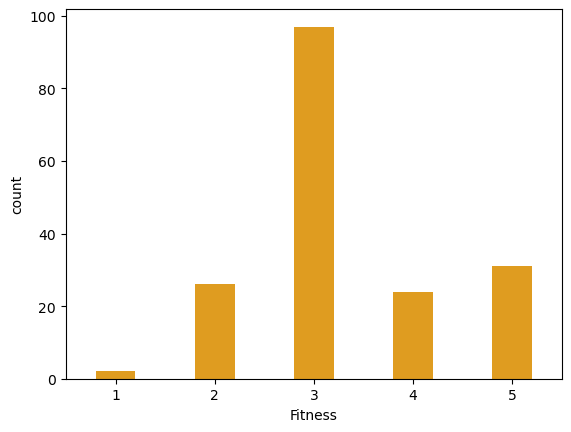

In [143]:
sns.countplot(data=df, x='Fitness', width = 0.4, color='orange')

## Histogram

<Axes: xlabel='Miles', ylabel='Count'>

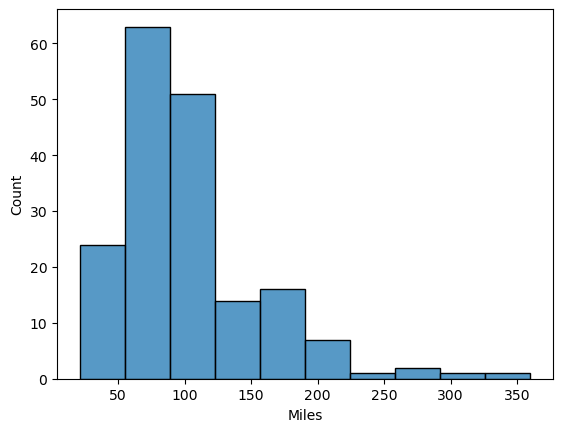

In [144]:
sns.histplot(df["Miles"], bins=10)

## Scatterplot

<Axes: xlabel='Income', ylabel='Miles'>

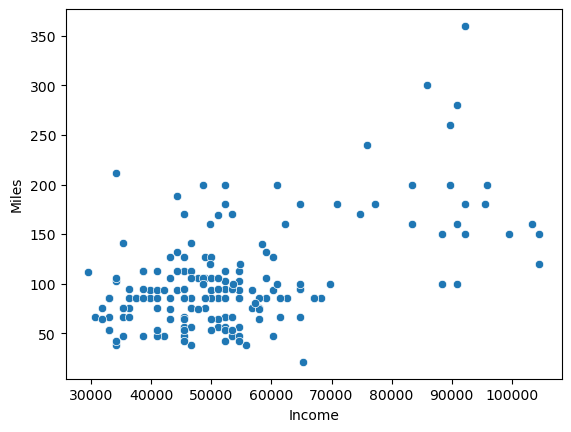

In [145]:
sns.scatterplot(df, x="Income", y="Miles")

## Histplot

<Axes: xlabel='Product', ylabel='Count'>

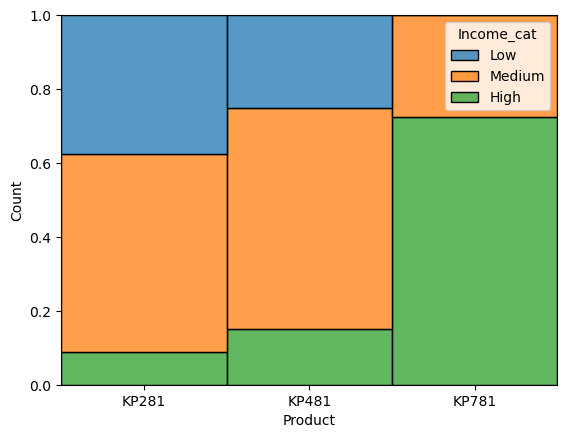

In [146]:
sns.histplot(df, x="Product", hue="Income_cat", multiple = "fill")

## Dodged bar plot

<Axes: xlabel='Product', ylabel='count'>

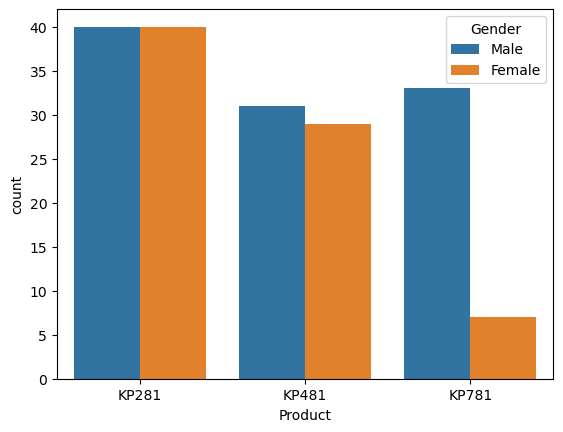

In [147]:
sns.countplot(df, x="Product", hue="Gender")

<Axes: xlabel='Product', ylabel='count'>

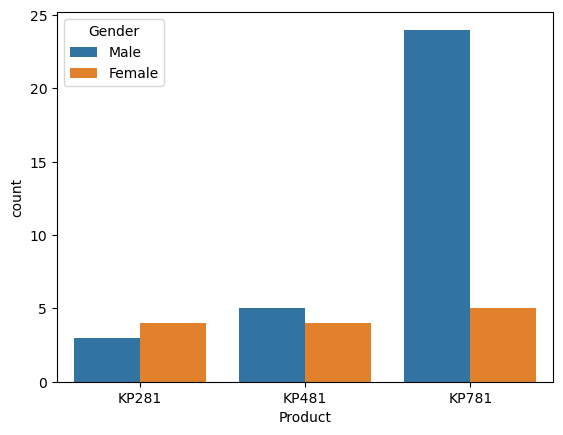

In [148]:
sns.countplot(df.loc[df["Income_cat"]=="High"], x="Product", hue="Gender")

## Boxplot

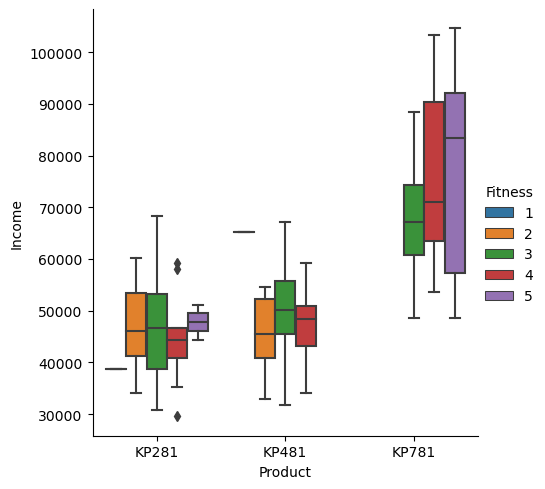

In [149]:
sns.catplot(df, x='Product', y='Income', hue="Fitness", kind = "box")

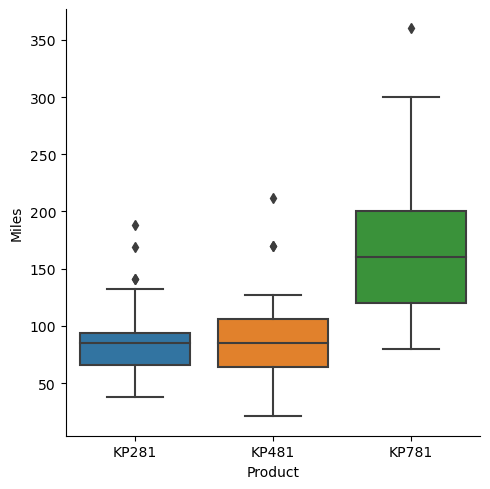

In [150]:
sns.catplot(df, x='Product', y='Miles', kind = "box")

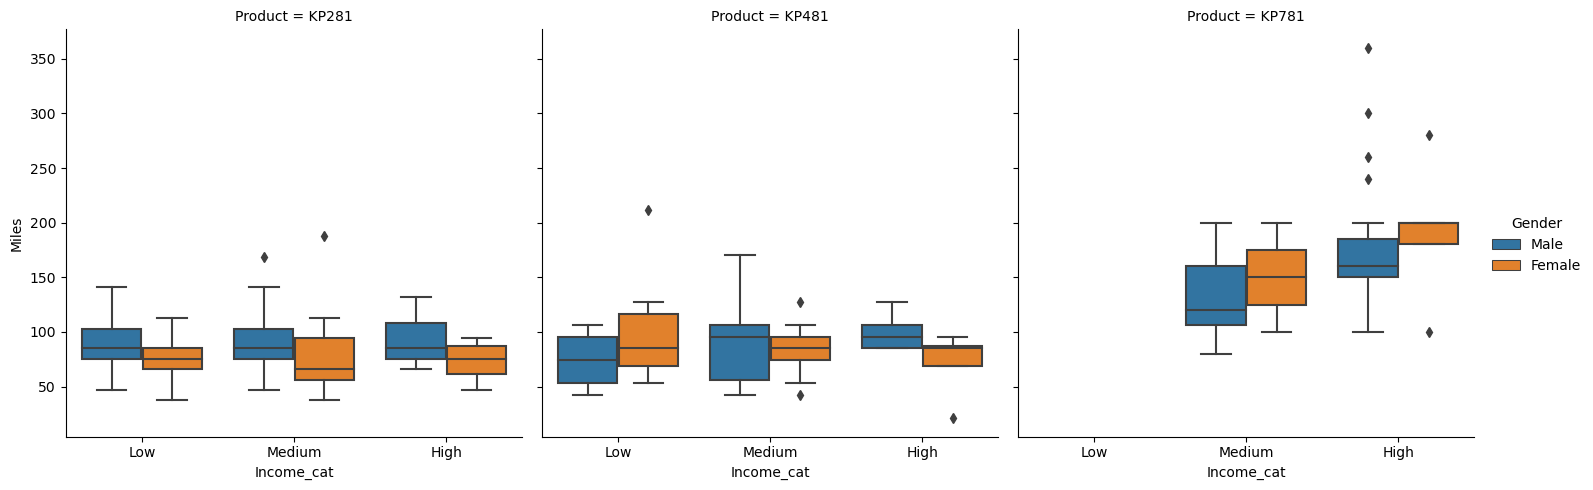

In [151]:
sns.catplot(df, x='Income_cat', y='Miles', hue="Gender", kind = "box", col="Product")

## Heatmap

C:\Users\DELL\AppData\Local\Temp\ipykernel_3552\591915564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="Greens")


<Axes: >

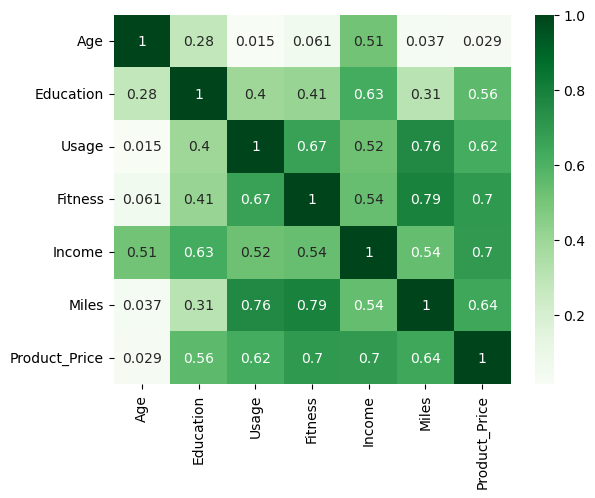

In [152]:
sns.heatmap(df.corr(), annot=True, cmap="Greens")

# Recommendations and Customer Profiling: